In [ ]:
import numpy as np

# Sample data
hours = np.array([0, 1, 1, 5, 9, 9, 10, 11, 12, 12])
gpa = np.array([0, 0, 0, 2, 3, 3, 3, 4, 4, 4])

In [ ]:
# @title 1.1 linear reg
class LinearRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the
 target values.
        """
        # Calculate coefficients using the closed-form solution
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

hours_reshape, gpa_reshape = hours.reshape(-1, 1), gpa.reshape(-1, 1)
lin_reg_scratch = LinearRegressionScratch() # Import and initialize scikit-learn class for linear regression models
lin_reg_scratch.fit(hours_reshape, gpa_reshape) # Train regression model
lin_reg_scratch.coef_, lin_reg_scratch.intercept_ # Take a look at the parameters learnt

(array([[0.33524355]]), -0.04670487106017189)

In [ ]:
# @title 1.2 - build linear model + learning update (gradient descent + learning rate)
class UpdatedLinearRegressionScratch:
    """
    Custom implementation of linear regression using gradient descent.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data using gradient descent.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the target values.
        """
        # Initialize coefficients (slope) and intercept to zero or random small values
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

        m = len(y)  # number of training examples

        for _ in range(self.n_iterations):
            # Calculate the predictions
            y_pred = self.predict(X)

            # Compute the residuals (errors)
            error = (1/m)*(y_pred - y)**2  # Note: just difference loss = the distance of prediction to ground truth, not a practical loss, like MSE, MAE

            # Calculate the gradient for intercept (slope) and coefficients (slope)
            intercept_gradient = (2/m) * np.sum(error)
            coef_gradient = (2/m) * np.dot(X.T, error)

            # Update the parameters using the gradients
            self.intercept_ -= self.learning_rate * intercept_gradient
            self.coef_ -= self.learning_rate * coef_gradient

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

hours_reshape, gpa_reshape = hours.reshape(-1, 1), gpa.reshape(-1, 1)
lr = 0.01
n_iter = 10
lin_reg_updated = UpdatedLinearRegressionScratch(learning_rate=lr, n_iterations=n_iter)
lin_reg_updated.fit(hours_reshape, gpa_reshape)
lin_reg_updated.coef_, lin_reg_updated.intercept_

(array([[0.32815914]]), -0.04782648055327146)

In [ ]:
# @title 2.1 polynomial reg from scratch (one iter update, power of 2)

# param init
a0, a1, a2 = 1, 1, 1  # assume coef at zero for all
alpha = 1e-4  # learning rate
iterations = 1  # iteration of Gradient Descent
m = len(hours)

# forward
def predict(x, a0, a1, a2):
    return a2 * x**2 + a1 * x + a0

# Cost function (MSE)
def compute_cost(hours, gpa, a0, a1, a2):
    predictions = predict(hours, a0, a1, a2)
    cost = (1/(m)) * np.sum((predictions - gpa)**2)
    return cost

# Gradient Descent
for _ in range(iterations):
    predictions = predict(hours, a0, a1, a2)

    # gradient compute
    dJ_da0 = (2/m) * np.sum(predictions - gpa)
    dJ_da1 = (2/m) * np.sum((predictions - gpa) * hours)
    dJ_da2 = (2/m) * np.sum((predictions - gpa) * hours**2)

    # parameter update
    a0 -= alpha * dJ_da0
    a1 -= alpha * dJ_da1
    a2 -= alpha * dJ_da2

    # cost compute if more iteration (optional)
    if _ % 100 == 0:
        print(f"Iteration {_}, Cost: {compute_cost(hours, gpa, a0, a1, a2)}")

print(f"Optimized a0: {a0}, a1: {a1}, a2: {a2}")

Iteration 0, Cost: 3415.607591976721
Optimized a0: 0.9849, a1: 0.84188, a2: -0.7092


In [ ]:
# @title 2.2 polynomial reg from scratch with np.linalg.lstsq (no update, only one iteration, power of 2)
# Define the degree of the polynomial
degree = 2

# Construct the design matrix
design_matrix = np.vander(hours, degree + 1)

# Perform polynomial regression
coefficients = np.linalg.lstsq(design_matrix, gpa, rcond=None)[0]

# Print the polynomial coefficients
print("Polynomial coefficients:")
print(coefficients)

# Define a function to evaluate the polynomial
def predict_gpa(hours):
  return np.polyval(coefficients, hours)

# Example prediction
# predicted_gpa = predict_gpa(8)
# print("Predicted GPA for 8 hours:", predicted_gpa)

Polynomial coefficients:
[-0.00412169  0.40022365 -0.21387164]


In [ ]:
# @title 2.3 polynomial reg (transforming to polynomial features & linear reg) from Scikit-learn (power of 2)
from sklearn.preprocessing import PolynomialFeatures

hours_reshape, gpa_reshape = hours.reshape(-1, 1), gpa.reshape(-1, 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
hours_poly_p2 = poly_features.fit_transform(hours_reshape)
hours_reshape[0], hours_poly_p2[0]

from sklearn.linear_model import LinearRegression
lin_reg_p2 = LinearRegression()
lin_reg_p2.fit(hours_poly_p2, gpa_reshape)
lin_reg_p2.intercept_, lin_reg_p2.coef_

(array([-0.21387164]), array([[ 0.40022365, -0.00412169]]))

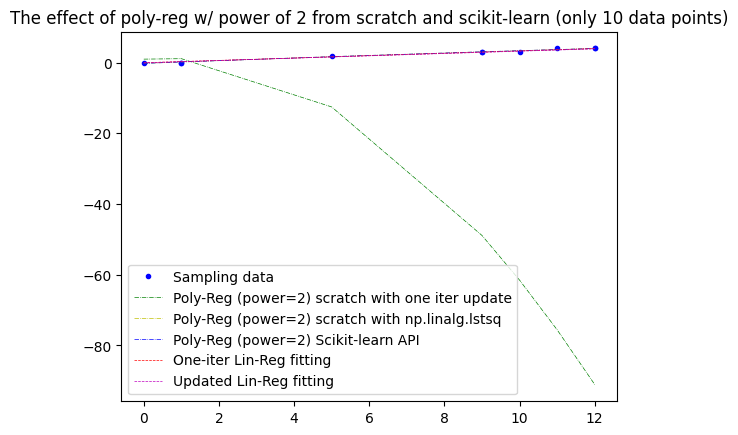

In [ ]:
import matplotlib.pyplot as plt
# Linear regression
y_linear = lin_reg_scratch.coef_[0]*hours + lin_reg_scratch.intercept_
# Updated Linear regression
y_lin_updated = lin_reg_updated.coef_[0]*hours + lin_reg_updated.intercept_
# Polynomial regression with power of 2 (Scratch with one iter update): Y = b0 + b1X^1 + b2X^2 + E, i.e., Y = -0.9849 + 0.84188.x^1 + -0.7092x^2
y_p2 = a2*(hours**2) + a1*(hours) + a0
# Polynomial regression with power of 2 (Scratch with np.linalg.lstsq): Y = b0 + b1X^1 + b2X^2 + E, i.e., Y = -0.21387164 + -0.00412169.x^1 + 0.40022365.x^2
y_p2_np = coefficients[1]*hours + coefficients[0]*(hours**2) + coefficients[2]
# Polynomial regression with power of 2 (Scikit-learn API): Y = b0 + b1X^1 + b2X^2 + E, i.e., Y = -0.21387164 + -0.00412169.x^1 + 0.40022365.x^2
y_p2_sci = lin_reg_p2.coef_[0][0]*hours + lin_reg_p2.coef_[0][1]*(hours**2) + lin_reg_p2.intercept_[0]

plt.plot(hours, gpa, "b.", label='Sampling data')
plt.plot(hours, y_p2, "g-.", label='Poly-Reg (power=2) scratch with one iter update', linewidth=0.5)
plt.plot(hours, y_p2_np, "y-.", label='Poly-Reg (power=2) scratch with np.linalg.lstsq', linewidth=0.5)
plt.plot(hours, y_p2_sci, "b-.", label='Poly-Reg (power=2) Scikit-learn API', linewidth=0.5)
plt.plot(hours, y_linear, "r--", label='One-iter Lin-Reg fitting', linewidth=0.5)
plt.plot(hours, y_lin_updated, "m--", label='Updated Lin-Reg fitting', linewidth=0.5)

plt.title('The effect of poly-reg w/ power of 2 from scratch and scikit-learn (only 10 data points)')
plt.legend()

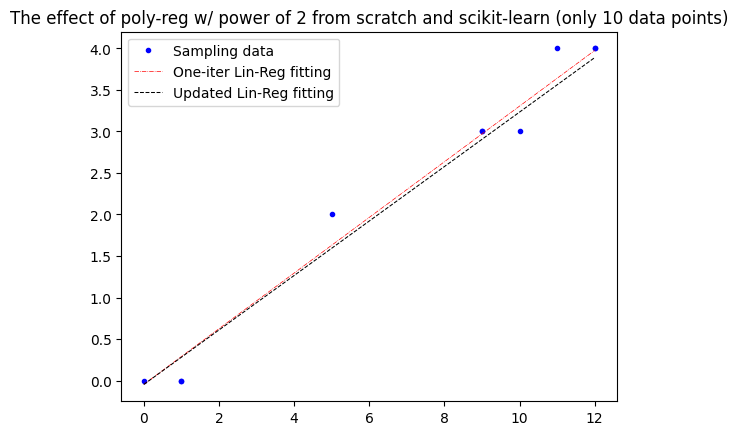

In [ ]:
# @title Linear plot

plt.plot(hours, gpa, "b.", label='Sampling data')
plt.plot(hours, y_linear, "r-.", label='One-iter Lin-Reg fitting', linewidth=0.5)
plt.plot(hours, y_lin_updated, "k--", label='Updated Lin-Reg fitting', linewidth=0.75)
plt.title('The effect of poly-reg w/ power of 2 from scratch and scikit-learn (only 10 data points)')
plt.legend()

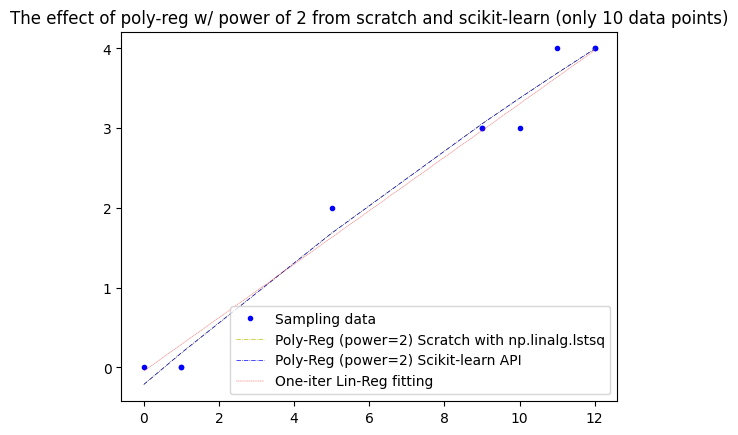

In [ ]:
# @title Cut the fitting of polynomial reg (from scratch) off

plt.plot(hours, gpa, "b.", label='Sampling data')
plt.plot(hours, y_p2_np, "y-.", label='Poly-Reg (power=2) Scratch with np.linalg.lstsq', linewidth=0.5)
plt.plot(hours, y_p2_sci, "b-.", label='Poly-Reg (power=2) Scikit-learn API', linewidth=0.5)
plt.plot(hours, y_linear, "r--", label='One-iter Lin-Reg fitting', linewidth=0.25)
# plt.plot(hours, y_lin_updated, "m--", label='Updated Lin-Reg fitting', linewidth=0.5)
plt.title('The effect of poly-reg w/ power of 2 from scratch and scikit-learn (only 10 data points)')
plt.legend()

In [ ]:
# @title R-Squared (R^2) metrics for all regression line plot
import sklearn.metrics as metrics
# linear
r2_lin = metrics.r2_score(gpa, y_linear)
r2_lin_up = metrics.r2_score(gpa, y_lin_updated)
# non-linear
r2_scratch = metrics.r2_score(gpa, y_p2)
r2_np = metrics.r2_score(gpa, y_p2_np)
r2_sci = metrics.r2_score(gpa, y_p2_sci)

print(f"Linearly \n\
      R^2 for linear-reg (scratch; one-iter): {r2_lin}\n\
      R^2 for linear-reg (scratch; updated): {r2_lin_up}\n\n\
Non-Linearly \n\
      R^2 for poly-reg; p=2 (scratch; one-iter): {r2_scratch}\n\
      R^2 for poly-reg; p=2 (np.linalg.lstsq): {r2_np}\n\
      R^2 for poly-reg; p=2 (scikit-learn): {r2_sci}")

Linearly 
      R^2 for linear-reg (scratch; one-iter): 0.9796476955486182
      R^2 for linear-reg (scratch; updated): 0.9794740571067466

Non-Linearly 
      R^2 for poly-reg; p=2 (scratch; one-iter): -1307.661912634759
      R^2 for poly-reg; p=2 (np.linalg.lstsq): 0.9825467677980017
      R^2 for poly-reg; p=2 (scikit-learn): 0.9825467677980017


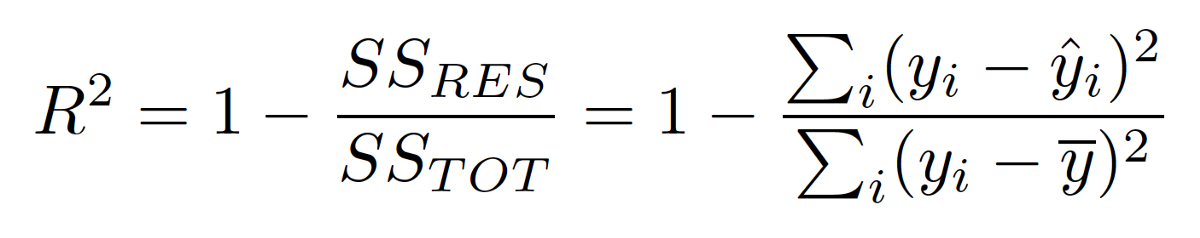

# Homework

1. จากโค้ดที่มีไว้เพื่อสร้าง data ต่อไปนี้
$$\textbf{y} = 3\textbf{x}^3 + 2\textbf{x}^2 + 3\textbf{x} + 4 + 2m*(rand(100,1)-1); m = noise $$
``` python
m = 1 # Noise Magnitude
X_HW = 2 * np.random.rand(100, 1)
y_HW = (X ** 3) + 2 * (X ** 2) + 3 * (X ** 1) + 4 + ((np.random.rand(100, 1) * 2 - 1) * m)
```
  1.1 สร้าง linear regression from scratch แล้ว run แค่เพียง inference (no update)
  ``` python
  class LinearRegressionScratch:
      """
      Custom implementation of linear regression using ordinary least squares (OLS).
      """
      def __init__(self):
          self.coef_ = None
          self.intercept_ = None

      def fit(self, X, y):
          """
          Fits the linear regression model to the given data.
          Args:
              X: A numpy array of shape (n_samples, n_features) representing the input data.
              y: A numpy array of shape (n_samples,) representing the
  target values.
          """
          # Calculate coefficients using the closed-form solution
          ...

      def predict(self, X):
          """
          Predicts the target values for new data.
          Args:
              X: A numpy array of shape (n_samples, n_features) representing the new input data.
          Returns:
              A numpy array of shape (n_samples,) representing the predicted target values.
          """
          return np.dot(X, self.coef_) + self.intercept_
  ```
  1.2 สร้าง polynomial regression from scratch แล้ว run กำหนดให้อัตราการเรียนรู้ (learning rate) เท่ากับ 1e-3 และจำนวนรอบการวนซ้ำ (iteration) เท่ากับ 1000 รอบ
  ``` python
  # param init
  a0, a1, a2 = ...
  alpha = ...  # learning rate
  iterations = ...  # iteration of Gradient Descent
  m = len(hours)

  # forward
    class PolyRegressionScratch:
      """
      Custom implementation of linear regression using ordinary least squares (OLS).
      """
      def __init__(self):
          self.a2 = 1
          self.a1 = 1
          self.a0 = 1

      def predict(x, a0, a1, a2):
          return a2 * x**2 + a1 * x + a0

      # Cost function (MSE)
      def compute_cost(self, hours, gpa):
          ...

      # Gradient Descent
      for _ in range(iterations):
          predictions = ...

          # gradient compute
          ...

          # parameter update
          ...

          # cost compute if more iteration (optional)
          if _ % 100 == 0:
              print(f"Iteration {_}, Cost: {compute_cost(self, hours, gpa)}")

      # print(f"Optimized a0: {a0}, a1: {a1}, a2: {a2}")

  ```
  1.3 เเปลงข้อมูลเป็น extended โดยที่กำหนด power degree เอง และนำ extended dataset ไป fit กับโมเดล Linear Regression
  ``` python
  from sklearn.preprocessing import PolynomialFeatures
  d = ? #เเทนค่าด้วย Degree ที่ควรจะใช้
  poly_features = PolynomialFeatures(degree=d, include_bias=False)
  X_poly = poly_features.fit_transform(X_HW)
  X_HW[0], X_poly[0]

  model = ? # เเทนค่า Linear Regression โมเดลที่ฝึกมาลงในตัวเเปล model
  ```

  1.4  เเเสดงผล plot จาก matplotlib.pyplot ตามโค้ดต่อไปนี้
  ``` python
  # Plot the data
  plt.plot(X_HW, y_HW, "b.", label='Sampling data')
  x = np.linspace(-3, 3, 1000)

  #...linear and non-linear equation สำหรับพล็อตเส้นถดถอย ????...

  plt.plot(x, y_linear, "y-.", label='Lin-Reg fitting', linewidth=0.25)
  plt.plot(x, y_p2_sc, "r--", label='Poly-Reg (power=2) from my class function', linewidth=0.5)
  plt.plot(x, y_p2_scikit, "g--", label='Poly-Reg (power=2) Scikit-learn API', linewidth=0.75)
  plt.title('LinearReg vs PolyReg (Scratch) vs PolyReg (Scikit)')
  plt.legend()
  ```

  1.5 วัดผลความแปรปรวนของตัวแปรตามหรือความเข้ากันของระบบเชิงเส้นถดถอยที่ทำนายต่อตัวแปรตามจริงจากระบบวัด R-Squared (R^2 metric) จากทั้ง 3 สมการที่ทำนายพร้อมอธิบายความแตกต่างจากการวัดและแสดงผลที่เกิดขึ้น